#### Created by: Osamah Mohammed Qaid Al-buhairi

### lets have a look at the data we are going to use for this project

This dataset provides valuable insights into the characteristics of diamonds, allowing us to explore their diverse attributes and qualities. The dataset comprises nine columns:

##### Carat: Carat weight is a measure of a diamond's size and is crucial in determining a diamond's value.

##### Quality of Cut: This attribute is categorized into five levels: Ideal, Premium, Very Good, Good, and Fair, reflecting the quality of the diamond's cut and its impact on its brilliance.

##### Color: Diamonds are graded on a scale from D (colorless) to Z (light yellow or brown), with variations in color affecting their visual appeal.

##### Clarity: Clarity describes the presence or absence of internal and external flaws (inclusions and blemishes) and is graded on a scale ranging from Flawless to Included.

##### Depth: The depth of the diamond, expressed as a percentage, influences the diamond's visual proportions and brilliance.

##### Table: The table is the flat, top facet of the diamond. The size and angle of the table can impact light reflection and the overall appearance of the diamond.

##### Dimensions (X, Y, Z): These three columns provide the physical dimensions of the diamond in terms of length (X), width (Y), and depth (Z).

By analyzing this data, we can gain a deeper understanding of how these attributes interplay and influence the overall quality and value of diamonds. Whether we're interested in predicting diamond prices, evaluating their quality, or exploring patterns within the diamond industry, this dataset offers a rich source of information for your Python analysis.

*************************************************************************************************************************


In [24]:
# importing the needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [2]:
# Data Collection 
df = pd.read_csv('DiamondData.csv')

# it is always a good idea to have a look at the first rows
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
2,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
3,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
4,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47


In [3]:
# Generate summary statistics for categorical (non-numeric) columns in the 'df' DataFrame.
df.describe(include="O")

,cut,color,clarity
count,43040,43040,43040
unique,5,7,8
top,Ideal,G,SI1
freq,17424,9080,10363


In [4]:
# Count and sum missing values in each column of the 'df' DataFrame.
df.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

as we can see, there is null cells, so we don't need to handle any missing values

In [5]:
# Count and sum the duplicated rows in the 'df' DataFrame.
df.duplicated().sum()

0

In [6]:
# Retrieve unique values in the 'cut' column of the 'df' DataFrame.
df['cut'].unique()

array(['Premium', 'Good', 'Very Good', 'Fair', 'Ideal'], dtype=object)

In [7]:
# Retrieve unique values in the 'color' column of the 'df' DataFrame.
df['color'].unique()

array(['E', 'I', 'J', 'F', 'H', 'D', 'G'], dtype=object)

In [8]:
# Retrieve unique values in the 'clarity' column of the 'df' DataFrame.
df['clarity'].unique()

array(['SI1', 'VS2', 'SI2', 'VVS2', 'VVS1', 'I1', 'VS1', 'IF'],
      dtype=object)

convert the categorial of the cut into numrical 
(Premium: 5, 
Good: 4, 
Very Good: 3, 
Fair: 2, 
Ideal: 1)

In [11]:
quality_mapping = {
    5 : 'Premium',
    4 : 'Good',
    3: 'Very Good',
    2: 'Fair',
    1: 'Ideal'
}

df['cut'] = df['cut'].map(quality_mapping)

In [12]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
2,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
3,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
4,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47


In [14]:
num_df =df

In [115]:
quality_mapping = {
    'Premium': 5,
    'Good': 4,
    'Very Good': 3,
    'Fair': 2,
    'Ideal': 1
}

dff['cut'] = dff['cut'].map(quality_mapping)

In [116]:
color_mapping = {
    'D': 7,
    'E': 6,
    'F': 5,
    'G': 4,
    'H': 3,
    'I': 2,
    'J': 1
}

dff['color'] = dff['color'].map(color_mapping)

In [117]:
clarity_mapping = {
    'IF': 8,
    'VVS1': 7,
    'VVS2': 6,
    'VS1': 5,
    'VS2': 4,
    'SI1': 3,
    'SI2': 2,
    'I1': 1
}

dff['clarity'] = dff['clarity'].map(clarity_mapping)

In [18]:
num_df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,2,0.21,5,6,3,59.8,61.0,326,3.89,3.84,2.31
1,4,0.29,5,2,4,62.4,58.0,334,4.20,4.23,2.63
2,5,0.31,4,1,2,63.3,58.0,335,4.34,4.35,2.75
3,6,0.24,3,1,6,62.8,57.0,336,3.94,3.96,2.48
4,7,0.24,3,2,7,62.3,57.0,336,3.95,3.98,2.47


In [24]:
# Calculate correlation matrix for the specific columns
corr_matrix = num_df.corr()
print(corr_matrix)
# Create a figure and set its size
plt.figure(figsize=(10, 8))

# Plot the correlation heatmap for the specific columns
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0)

# Show the plot
plt.title('Correlation Heatmap for the Columns')
plt.show()

KeyError: ('carat', 'cut', 'clarity', 'depth', 'table', 'price', 'size')

In [118]:
dff['size'] = dff['x'] * dff['y'] * dff['z']

In [23]:
num_df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,size
0,2,0.21,5,6,3,59.8,61.0,326,3.89,3.84,2.31,34.505856
1,4,0.29,5,2,4,62.4,58.0,334,4.20,4.23,2.63,46.724580
2,5,0.31,4,1,2,63.3,58.0,335,4.34,4.35,2.75,51.917250
3,6,0.24,3,1,6,62.8,57.0,336,3.94,3.96,2.48,38.693952
4,7,0.24,3,2,7,62.3,57.0,336,3.95,3.98,2.47,38.830870


In [120]:
dff.drop(['x'])

KeyError: "['x'] not found in axis"

In [121]:
dff.drop(['x', 'y', 'z'], axis=1, inplace=True)

            carat       cut     color   clarity     depth     table     price  \
carat    1.000000  0.163356 -0.289262 -0.358092  0.022599  0.191260  0.923801   
cut      0.163356  1.000000 -0.038496 -0.188077 -0.092928  0.526645  0.116498   
color   -0.289262 -0.038496  1.000000 -0.031105 -0.044708 -0.035701 -0.176747   
clarity -0.358092 -0.188077 -0.031105  1.000000 -0.062631 -0.167485 -0.157169   
depth    0.022599 -0.092928 -0.044708 -0.062631  1.000000 -0.292084 -0.014393   
table    0.191260  0.526645 -0.035701 -0.167485 -0.292084  1.000000  0.136975   
price    0.923801  0.116498 -0.176747 -0.157169 -0.014393  0.136975  1.000000   
size     0.971798  0.153573 -0.280759 -0.344399  0.003603  0.175696  0.900422   

             size  
carat    0.971798  
cut      0.153573  
color   -0.280759  
clarity -0.344399  
depth    0.003603  
table    0.175696  
price    0.900422  
size     1.000000  


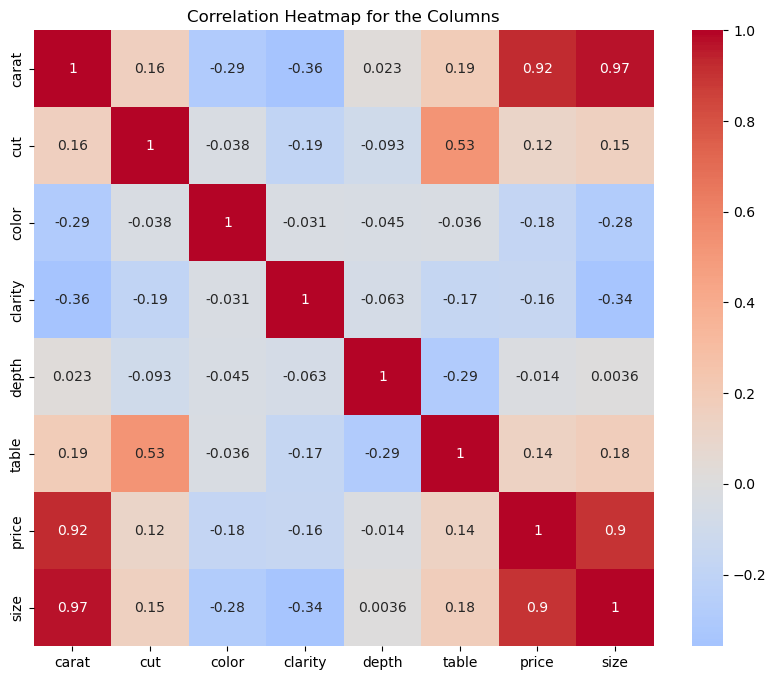

In [30]:
# Calculate correlation matrix for the specific columns
corr_matrix = num_df.corr()
print(corr_matrix)
# Create a figure and set its size
plt.figure(figsize=(10, 8))

# Plot the correlation heatmap for the specific columns
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0)

# Show the plot
plt.title('Correlation Heatmap for the Columns')
plt.show()

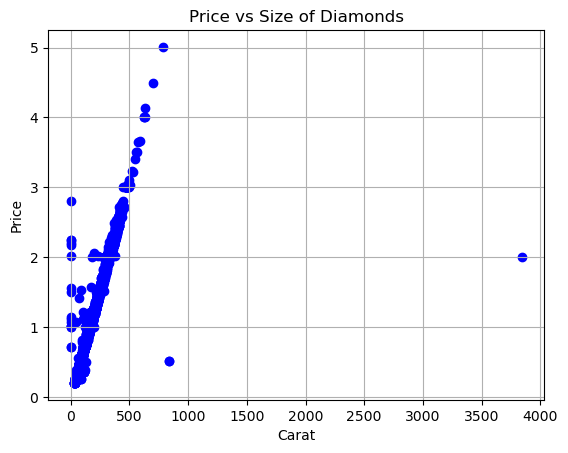

In [36]:
plt.scatter(num_df['size'], num_df['carat'], color='blue', marker='o')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.title('Price vs Size of Diamonds')
plt.grid(True)

# Show the scatter plot
plt.show()







(0.0, 19747.85)

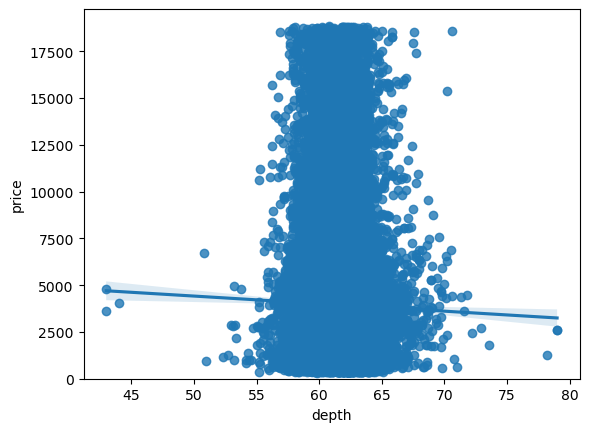

In [40]:
sns.regplot(x='depth',y= 'price', data=num_df)
plt.ylim(0,)

<AxesSubplot:xlabel='color', ylabel='price'>

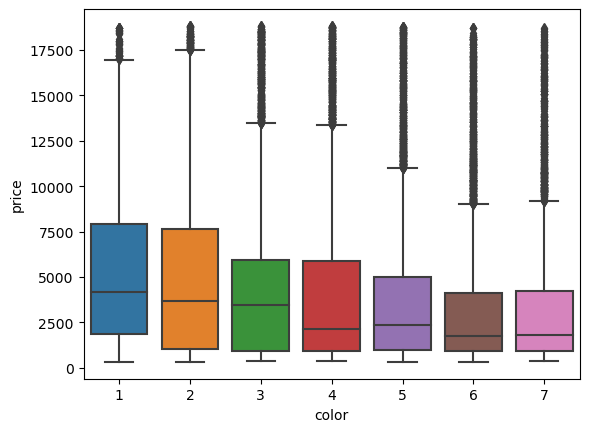

In [44]:
sns.boxplot(x='color', y='price',data=num_df)

In [43]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [92]:
X = num_df[['carat']]
Y = num_df[['price']]
lr= LinearRegression()
lr.fit(X, Y)
lr.score(X, Y)

0.6348162455763315

In [48]:
features =num_df[["carat", "size"]]  
Y = num_df[['price']]
lm = LinearRegression()
lm.fit(features, Y)

LinearRegression()

In [49]:
lm.score(features, Y)

0.8535363812532002

In [52]:
color_counts = num_df['color'].value_counts()

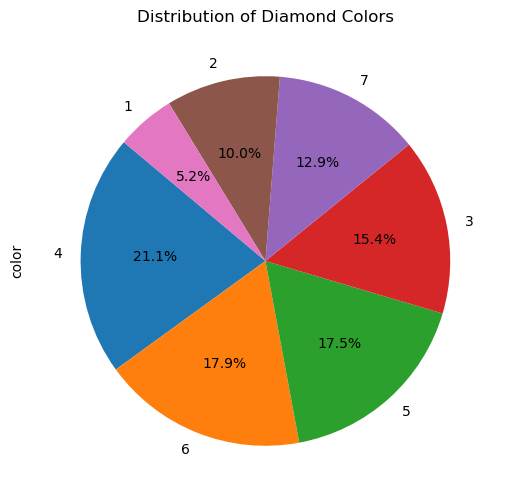

In [53]:
plt.figure(figsize=(6, 6))  # Adjust the figure size as needed
color_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)

plt.title('Distribution of Diamond Colors')
plt.show()

In [54]:
color_counts = df['color'].value_counts()

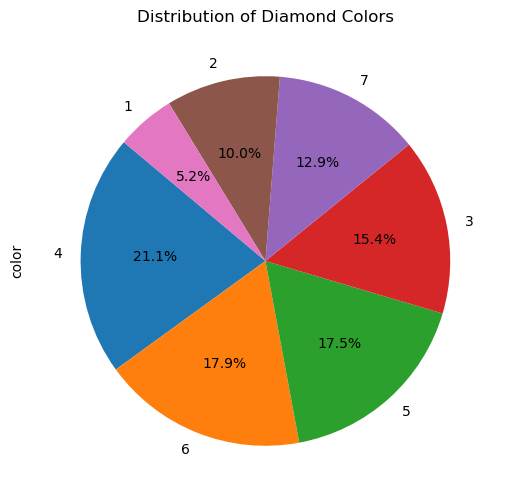

In [55]:
plt.figure(figsize=(6, 6))  # Adjust the figure size as needed
color_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)

plt.title('Distribution of Diamond Colors')
plt.show()

In [56]:
df.head()

,carat,cut,color,clarity,depth,table,price,size
0,0.21,5,6,3,59.8,61.0,326,34.505856
1,0.29,5,2,4,62.4,58.0,334,46.724580
2,0.31,4,1,2,63.3,58.0,335,51.917250
3,0.24,3,1,6,62.8,57.0,336,38.693952
4,0.24,3,2,7,62.3,57.0,336,38.830870


In [57]:
print("The R-square is : ", lm.score(features, Y))

The R-square is :  0.8535363812532002


In [58]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and test sets (80% train, 20% test)


y = num_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
from sklearn.linear_model import LogisticRegression

train = LogisticRegression(max_iter=50, random_state=42)
train.fit(X_train, y_train)
y_pred = train.predict(X_test)

KeyboardInterrupt: 

In [60]:
from sklearn.linear_model import LogisticRegression

# Create the Logistic Regression model with the verbose parameter
train = LogisticRegression(max_iter=50, random_state=42, verbose=1)
train.fit(X_train, y_train)  # The training process will now display progress information

y_pred = train.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KeyboardInterrupt: 

In [61]:
from tqdm import tqdm


In [62]:
train = LogisticRegression(max_iter=50, random_state=42)

# Define the number of iterations (adjust as needed)
num_iterations = 50

# Create a tqdm progress bar to monitor training progress
with tqdm(total=num_iterations, desc="Training") as pbar:
    for _ in range(num_iterations):
        # Fit the model for one iteration
        train.fit(X_train, y_train)
        y_pred = train.predict(X_test)
        
        # Update the progress bar
        pbar.update(1)

# After the loop, the model is trained, and the progress bar is complete
print("Training completed")


Training:   0%|                                                                                 | 0/50 [01:09<?, ?it/s]


KeyboardInterrupt: 

In [64]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and test sets (80% train, 20% test)
X = num_df.drop(['price'], axis=1)
y = num_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
num_df.head()

,carat,cut,color,clarity,depth,table,price,size
0,0.21,5,6,3,59.8,61.0,326,34.505856
1,0.29,5,2,4,62.4,58.0,334,46.724580
2,0.31,4,1,2,63.3,58.0,335,51.917250
3,0.24,3,1,6,62.8,57.0,336,38.693952
4,0.24,3,2,7,62.3,57.0,336,38.830870


In [65]:
train = LogisticRegression(max_iter=50, random_state=42)

# Define the number of iterations (adjust as needed)
num_iterations = 50

# Create a tqdm progress bar to monitor training progress
with tqdm(total=num_iterations, desc="Training") as pbar:
    for _ in range(num_iterations):
        # Fit the model for one iteration
        train.fit(X_train, y_train)
        y_pred = train.predict(X_test)
        
        # Update the progress bar
        pbar.update(1)

# After the loop, the model is trained, and the progress bar is complete
print("Training completed")


Training:   0%|                                                                                 | 0/50 [02:02<?, ?it/s]


KeyboardInterrupt: 

In [66]:
x_data = num_df.drop('price', axis=1)
y_data = num_df['price']

In [67]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)

In [68]:
print("Number of test samples is: ", x_test.shape[0])
print("Number of training samples is: ",x_train.shape[0])

Number of test samples is:  4304
Number of training samples is:  38736


In [69]:
num_df.head()

,carat,cut,color,clarity,depth,table,price,size
0,0.21,5,6,3,59.8,61.0,326,34.505856
1,0.29,5,2,4,62.4,58.0,334,46.724580
2,0.31,4,1,2,63.3,58.0,335,51.917250
3,0.24,3,1,6,62.8,57.0,336,38.693952
4,0.24,3,2,7,62.3,57.0,336,38.830870


In [71]:
num_df['price'].max()

18823

In [72]:
num_df['price'].min()

326

0.36654275092936806

In [78]:
num_df[num_df['price'] > num_df['price'].mean()].count()

carat      15776
cut        15776
color      15776
clarity    15776
depth      15776
table      15776
price      15776
size       15776
dtype: int64

In [79]:
num_df[num_df['price'] < num_df['price'].mean()].count()

carat      27264
cut        27264
color      27264
clarity    27264
depth      27264
table      27264
price      27264
size       27264
dtype: int64

In [80]:
len(num_df)

43040

In [81]:
average_price = num_df['price'].mean()
num_df['price'] = (num_df['price'] > average_price).astype(int)

In [84]:
num_df[num_df['price'] == 1].count()

carat      15776
cut        15776
color      15776
clarity    15776
depth      15776
table      15776
price      15776
size       15776
dtype: int64

1 = high
0 = low

In [87]:
num_df['price'].value_counts()

0    27264
1    15776
Name: price, dtype: int64

In [88]:
num_df.head()

,carat,cut,color,clarity,depth,table,price,size
0,0.21,5,6,3,59.8,61.0,0,34.505856
1,0.29,5,2,4,62.4,58.0,0,46.724580
2,0.31,4,1,2,63.3,58.0,0,51.917250
3,0.24,3,1,6,62.8,57.0,0,38.693952
4,0.24,3,2,7,62.3,57.0,0,38.830870


            carat       cut     color   clarity     depth     table     price  \
carat    1.000000  0.163356 -0.289262 -0.358092  0.022599  0.191260  0.796754   
cut      0.163356  1.000000 -0.038496 -0.188077 -0.092928  0.526645  0.142288   
color   -0.289262 -0.038496  1.000000 -0.031105 -0.044708 -0.035701 -0.167014   
clarity -0.358092 -0.188077 -0.031105  1.000000 -0.062631 -0.167485 -0.215696   
depth    0.022599 -0.092928 -0.044708 -0.062631  1.000000 -0.292084  0.004510   
table    0.191260  0.526645 -0.035701 -0.167485 -0.292084  1.000000  0.151975   
price    0.796754  0.142288 -0.167014 -0.215696  0.004510  0.151975  1.000000   
size     0.971798  0.153573 -0.280759 -0.344399  0.003603  0.175696  0.775723   

             size  
carat    0.971798  
cut      0.153573  
color   -0.280759  
clarity -0.344399  
depth    0.003603  
table    0.175696  
price    0.775723  
size     1.000000  


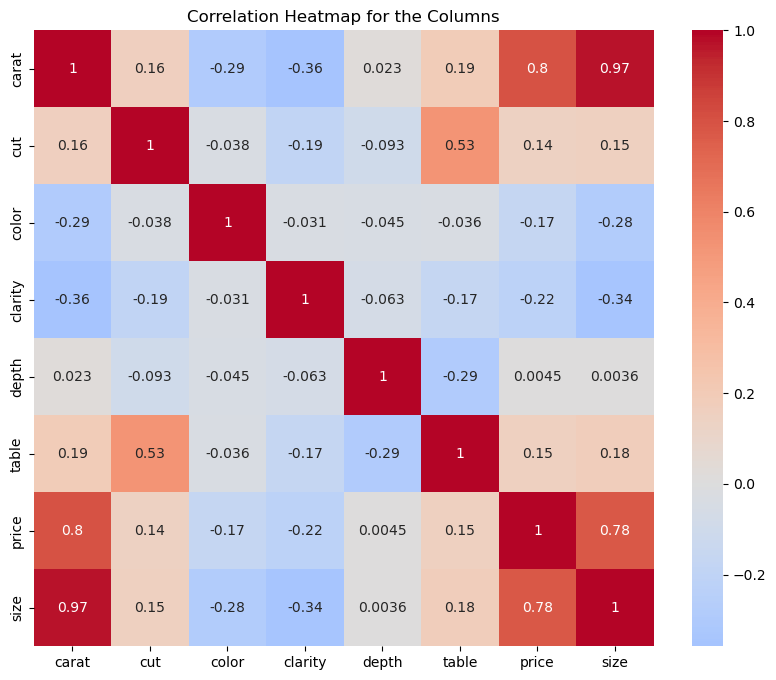

In [89]:
# Calculate correlation matrix for the specific columns
corr_matrix = num_df.corr()
print(corr_matrix)
# Create a figure and set its size
plt.figure(figsize=(10, 8))

# Plot the correlation heatmap for the specific columns
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0)

# Show the plot
plt.title('Correlation Heatmap for the Columns')
plt.show()

In [142]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and test sets (80% train, 20% test)
X = num_df.drop('price', axis=1)
y = num_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [143]:
from sklearn.linear_model import LogisticRegression

train = LogisticRegression(max_iter=50, random_state=42)
train.fit(X_train, y_train)
y_pred = train.predict(X_test)

C:\Users\osama\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [144]:
train = LogisticRegression(max_iter=50, random_state=42)

# Define the number of iterations (adjust as needed)
num_iterations = 50

# Create a tqdm progress bar to monitor training progress
with tqdm(total=num_iterations, desc="Training") as pbar:
    for _ in range(num_iterations):
        # Fit the model for one iteration
        train.fit(X_train, y_train)
        y_pred = train.predict(X_test)
        
        # Update the progress bar
        pbar.update(1)

# After the loop, the model is trained, and the progress bar is complete
print("Training completed")


Training:   0%|                                                                                 | 0/50 [00:00<?, ?it/s]C:\Users\osama\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
Training:   2%|█▍                                                                       | 1/50 [00:00<00:06,  7.48it/s]C:\Users\osama\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data 

Training completed


In [145]:
# 5. Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
print("The accuarcy is : ",accuracy)

The accuarcy is :  0.9630576208178439


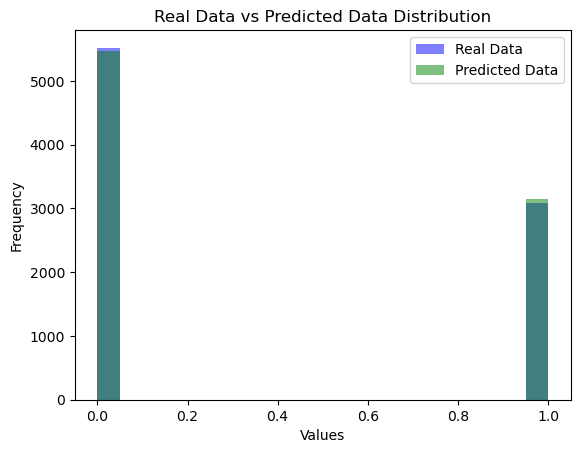

In [105]:
plt.hist(y_test, alpha=0.5, label='Real Data', bins=20, color='blue')

# Plot the predicted data distribution
plt.hist(y_pred, alpha=0.5, label='Predicted Data', bins=20, color='green')

plt.legend(loc='upper right')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Real Data vs Predicted Data Distribution')
plt.show()

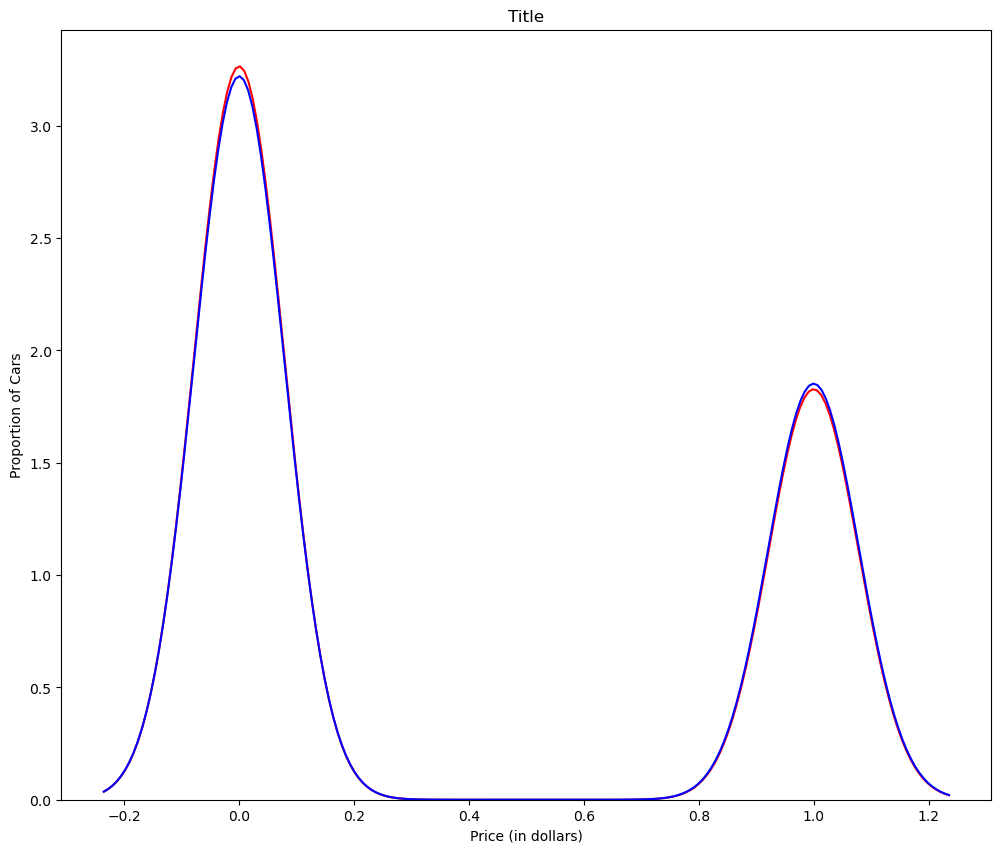

In [146]:
DistributionPlot(y_test, y_pred, "Actual Values (Test)", "Predicted Values (Test)", 'Title')

In [107]:
from sklearn.preprocessing import PolynomialFeatures

In [109]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    ax1 = sns.kdeplot(RedFunction, color="r", label=RedName)
    ax2 = sns.kdeplot(BlueFunction, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')
    plt.show()
    plt.close()

In [112]:
df.head()

,carat,cut,color,clarity,depth,table,price,size
0,0.21,5,6,3,59.8,61.0,0,34.505856
1,0.29,5,2,4,62.4,58.0,0,46.724580
2,0.31,4,1,2,63.3,58.0,0,51.917250
3,0.24,3,1,6,62.8,57.0,0,38.693952
4,0.24,3,2,7,62.3,57.0,0,38.830870


In [113]:
dff = pd.read_csv('DiamondData.csv')

In [114]:
dff.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
2,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
3,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
4,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47


In [122]:
dff.head()

,carat,cut,color,clarity,depth,table,price,size
0,0.21,5,6,3,59.8,61.0,326,34.505856
1,0.29,5,2,4,62.4,58.0,334,46.724580
2,0.31,4,1,2,63.3,58.0,335,51.917250
3,0.24,3,1,6,62.8,57.0,336,38.693952
4,0.24,3,2,7,62.3,57.0,336,38.830870


In [123]:
dff['price'] = pd.qcut(dff['price'], q=3, labels=[1, 2, 3])

In [131]:
dff.head()

,carat,cut,color,clarity,depth,table,price,size
0,0.21,5,6,3,59.8,61.0,1,34.505856
1,0.29,5,2,4,62.4,58.0,1,46.724580
2,0.31,4,1,2,63.3,58.0,1,51.917250
3,0.24,3,1,6,62.8,57.0,1,38.693952
4,0.24,3,2,7,62.3,57.0,1,38.830870


In [136]:
X = dff.drop('price', axis=1)
y = dff['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [137]:
train = LogisticRegression(max_iter=50, random_state=42)
train.fit(X_train, y_train)
y_pred = train.predict(X_test)

C:\Users\osama\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [139]:
accuracy = accuracy_score(y_test, y_pred)
print("The accuarcy is : ",accuracy)

The accuarcy is :  0.9330855018587361


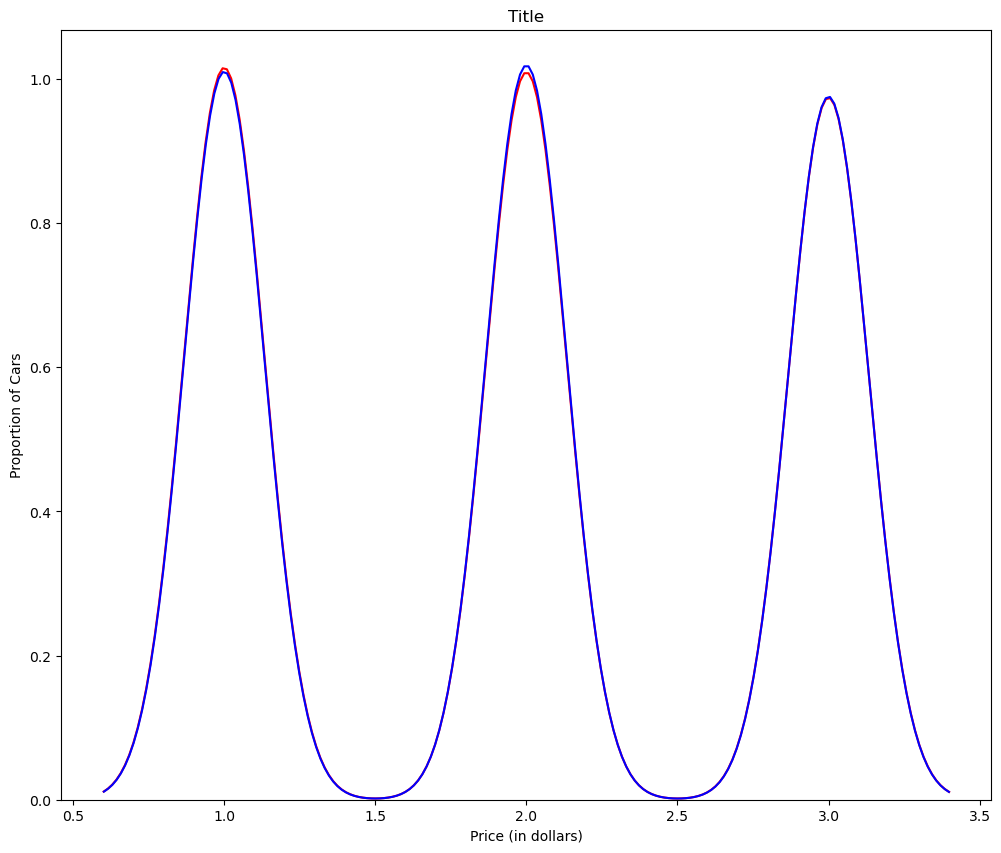

In [140]:
DistributionPlot(y_test, y_pred, "Actual Values (Test)", "Predicted Values (Test)", 'Title')

            carat       cut     color   clarity     depth     table     price  \
carat    1.000000  0.163356 -0.289262 -0.358092  0.022599  0.191260  0.835357   
cut      0.163356  1.000000 -0.038496 -0.188077 -0.092928  0.526645  0.126769   
color   -0.289262 -0.038496  1.000000 -0.031105 -0.044708 -0.035701 -0.141908   
clarity -0.358092 -0.188077 -0.031105  1.000000 -0.062631 -0.167485 -0.253757   
depth    0.022599 -0.092928 -0.044708 -0.062631  1.000000 -0.292084  0.002672   
table    0.191260  0.526645 -0.035701 -0.167485 -0.292084  1.000000  0.163219   
price    0.835357  0.126769 -0.141908 -0.253757  0.002672  0.163219  1.000000   
size     0.971798  0.153573 -0.280759 -0.344399  0.003603  0.175696  0.813819   

             size  
carat    0.971798  
cut      0.153573  
color   -0.280759  
clarity -0.344399  
depth    0.003603  
table    0.175696  
price    0.813819  
size     1.000000  


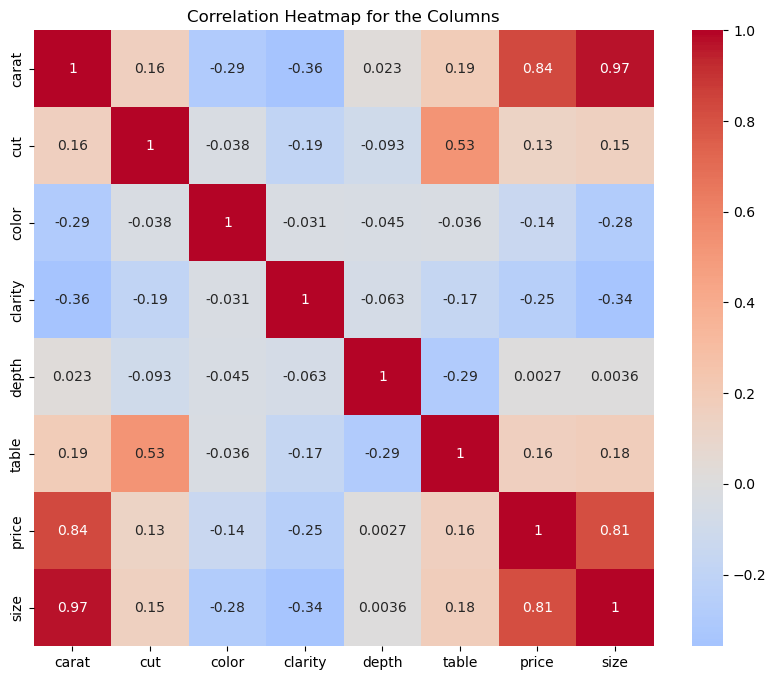

In [135]:
corr_matrix = dff.corr()
print(corr_matrix)
# Create a figure and set its size
plt.figure(figsize=(10, 8))

# Plot the correlation heatmap for the specific columns
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0)

# Show the plot
plt.title('Correlation Heatmap for the Columns')
plt.show()

In [132]:
dff.head()

,carat,cut,color,clarity,depth,table,price,size
0,0.21,5,6,3,59.8,61.0,1,34.505856
1,0.29,5,2,4,62.4,58.0,1,46.724580
2,0.31,4,1,2,63.3,58.0,1,51.917250
3,0.24,3,1,6,62.8,57.0,1,38.693952
4,0.24,3,2,7,62.3,57.0,1,38.830870


In [133]:
dff['price'] = dff['price'].astype(int)

In [134]:
dff.head()

,carat,cut,color,clarity,depth,table,price,size
0,0.21,5,6,3,59.8,61.0,1,34.505856
1,0.29,5,2,4,62.4,58.0,1,46.724580
2,0.31,4,1,2,63.3,58.0,1,51.917250
3,0.24,3,1,6,62.8,57.0,1,38.693952
4,0.24,3,2,7,62.3,57.0,1,38.830870


In [147]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[5333  186]
 [ 132 2957]]


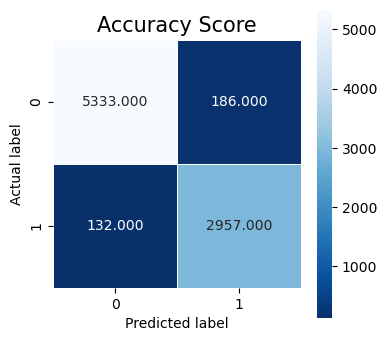

In [148]:
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score'
plt.title(all_sample_title, size = 15);

In [149]:
train = LogisticRegression(max_iter=300, random_state=42)
train.fit(X_train, y_train)
y_pred = train.predict(X_test)
y_pred

array([0, 1, 1, ..., 0, 1, 0])

In [150]:
# 5. Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
print("The accuarcy is : ",accuracy)

The accuarcy is :  0.9653810408921933


In [151]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[5354  165]
 [ 133 2956]]


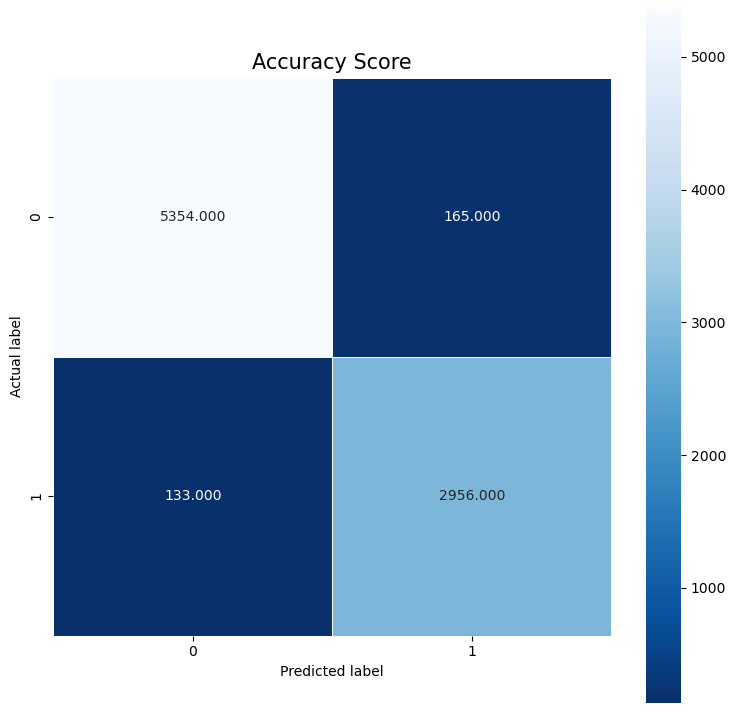

In [152]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score'
plt.title(all_sample_title, size = 15);

In [153]:
import joblib


In [154]:
model_filename = 'model_of _data.joblib'
joblib.dump(train, model_filename)
print(f"Model saved as {model_filename}")

Model saved as model_of _data.joblib


In [155]:
model_data = joblib.load(model_filename)


In [156]:
test = model_data.predict(X_test.head(1))
test

array([0])

In [157]:
num_df.to_csv('project file.csv')

In [14]:
dataset = pd.read_csv('project file.csv')

In [2]:
import pandas as pd

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [15]:
dataset.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,size
0,0,0.21,5,6,3,59.8,61.0,0,34.505856
1,1,0.29,5,2,4,62.4,58.0,0,46.724580
2,2,0.31,4,1,2,63.3,58.0,0,51.917250
3,3,0.24,3,1,6,62.8,57.0,0,38.693952
4,4,0.24,3,2,7,62.3,57.0,0,38.830870


In [16]:
dataset.drop('Unnamed: 0',axis=1, inplace=True)

In [17]:
dataset.head()

,carat,cut,color,clarity,depth,table,price,size
0,0.21,5,6,3,59.8,61.0,0,34.505856
1,0.29,5,2,4,62.4,58.0,0,46.724580
2,0.31,4,1,2,63.3,58.0,0,51.917250
3,0.24,3,1,6,62.8,57.0,0,38.693952
4,0.24,3,2,7,62.3,57.0,0,38.830870


In [9]:
dataset['price'].value_counts()

0    27264
1    15776
Name: price, dtype: int64

In [32]:
X = dataset.drop('price', axis=1)

In [33]:
y = dataset['price']

In [21]:
from sklearn.model_selection import train_test_split


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
accuracy = accuracy_score(y_test, y_pred)
print("The accuarcy is : ",accuracy)

NameError: name 'y_pred' is not defined

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [27]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [28]:
y_pred = classifier.predict(X_test)

In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[5353  166]
 [ 133 2956]]


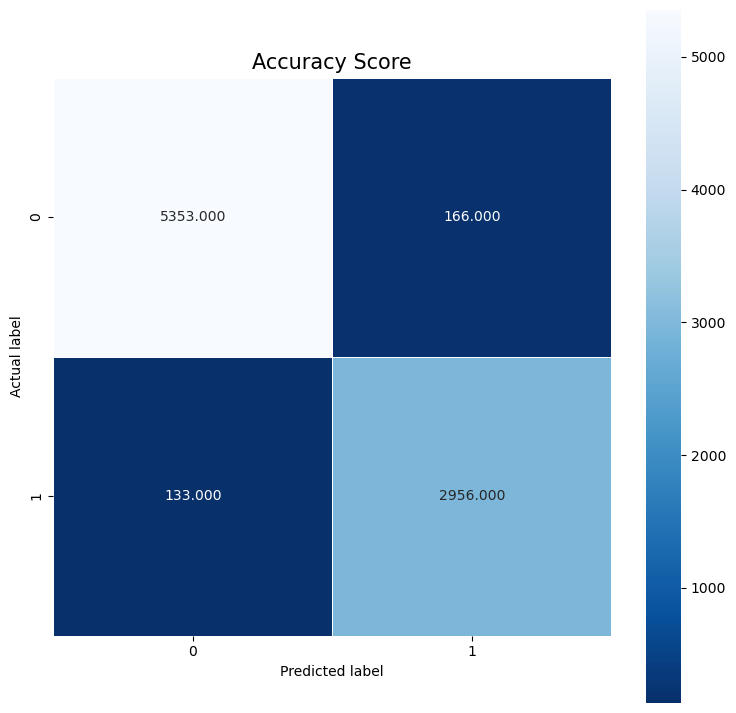

In [30]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score'
plt.title(all_sample_title, size = 15);

In [31]:
accuracy = accuracy_score(y_test, y_pred)
print("The accuarcy is : ",accuracy)

The accuarcy is :  0.9652648698884758


In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [36]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [37]:
y_pred = classifier.predict(X_test)

C:\Users\osama\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [38]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[5267  210]
 [ 153 2978]]


In [39]:
accuracy = accuracy_score(y_test, y_pred)
print("The accuarcy is : ",accuracy)

The accuarcy is :  0.9578299256505576


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)


In [41]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [42]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)
print (classifier.score(X_test, y_test))

0.9715381040892194


In [43]:
y_pred = classifier.predict(X_test)

In [44]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[5343  134]
 [ 111 3020]]


In [45]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [46]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Example classifier
# clf = RandomForestClassifier()

# Cross-validation (assuming X and y are your data and labels)
scores = cross_val_score(classifier, X, y, cv=5)  # 5-fold cross-validation

average_accuracy = scores.mean()
print(average_accuracy)

0.9668912639405205
